# Word embeddings
## WE en spaCy
Los word embeddings (o word vectors) son representaciones numéricas de las palabras, generadas con una reducción de dimensionalidad sobre una matriz de co-ocurrencia sobre un corpus enorme. Spacy utiliza los word vectors de GloVe, (*Stanford's Global Vectors for Word Representation*). Estos vectores se pueden utilizar para calcular la similaridad semántica entre palabras o documentos.

El vocabulario por defecto en el modelo spaCy del idioma inglés (`en_core_web_sm`) es muy pequeño. Hay que cargar en_core_web_md (`python -m spacy download en_core_web_md`) para tener un conjunto de word vectors mayor. El modelo de tamaño medio en español (`python -m spacy download es_core_news_md`) contiene vectores también.

In [1]:
import spacy
nlp = spacy.load("es_core_news_md")

In [2]:
nlp.vocab.vectors

In [3]:
len(nlp.vocab.vectors)

20000

In [4]:
nlp.vocab.vectors_length

300

In [5]:
madrid = nlp.vocab["Madrid"]
madrid.vector.shape

(300,)

In [6]:
type(madrid)

spacy.lexeme.Lexeme

In [7]:
doc = nlp("me voy a Madrid")

In [8]:
doc[3]

Madrid

In [9]:
type(doc[3])

spacy.tokens.token.Token

El vector del lexema 'Madrid' es igual al token 'Madrid'

In [10]:
sum(madrid.vector == doc[3].vector)

300

In [11]:
madrid.vector[:10]

array([ 0.19316, -1.9055 ,  1.1441 , -0.45437, -0.74829,  0.38813,
       -2.351  , -1.6627 ,  1.7095 , -0.18088], dtype=float32)

In [12]:
nlp.vocab.get_vector("Madrid")[:10]

array([ 0.19316, -1.9055 ,  1.1441 , -0.45437, -0.74829,  0.38813,
       -2.351  , -1.6627 ,  1.7095 , -0.18088], dtype=float32)

In [13]:
nlp.vocab.get_vector("madrid")[:10]

array([ 1.6385 , -2.0342 ,  1.2039 , -0.26136, -0.38418,  0.58334,
       -1.998  ,  0.58018,  2.4063 ,  1.1769 ], dtype=float32)

In [14]:
doc[3].vector[:10]

array([ 0.19316, -1.9055 ,  1.1441 , -0.45437, -0.74829,  0.38813,
       -2.351  , -1.6627 ,  1.7095 , -0.18088], dtype=float32)

Similitudes

In [15]:
toledo = nlp.vocab["Toledo"]
madrid.similarity(toledo)

0.5816110372543335

In [16]:
madrid.similarity(nlp.vocab["madrid"])

0.5674049258232117

In [17]:
manzana = nlp.vocab["manzana"]
madrid.similarity(manzana)

0.0649627298116684

In [18]:
pera = nlp.vocab["pera"]
pera.similarity(manzana)

1.0000001192092896

In [19]:
nlp_en = spacy.load('en_core_web_md')

In [20]:
len(nlp_en.vocab.vectors)

20000

In [21]:
nlp_en.vocab.vectors

In [22]:
nlp_en.vocab.vectors_length

300

`spaCy` no precarga el vocabulario para los modelos con vectores (a partir de la v2.3)

Los lexemas se cargan conforme se usan en el texto. Pero queremos cargar todos los lexemas podemos recorrer todo el vocabulario con:

In [23]:
len(nlp_en.vocab)

764

In [24]:
for orth in nlp_en.vocab.vectors:
    _ = nlp_en.vocab[orth]

In [25]:
len(nlp_en.vocab)

514336

In [26]:
nlp_en = spacy.load('en_core_web_md')

nasa = nlp_en.vocab['nasa']

# cogemos todas las palabras del vocabulario que tienen vector, en minúsculas
# a partir de spaCy 2.3 no se puede recorrer el vocabulario con nlp.vocab sino nlp.vocab.vectors
# https://spacy.io/usage/v2-3
allWords = list({nlp_en.vocab[l] for l in nlp_en.vocab.vectors
                 if nlp_en.vocab[l].has_vector
 #                and nlp_en.vocab[l].orth_.islower()
                 and nlp_en.vocab[l].lower_ != "nasa"})


print("longitud:",len(allWords))
    
# ordenamos por similitud con NASA
allWords.sort(key=lambda w: nasa.similarity(w))
allWords.reverse()
print("Top 20 palabras más similares a NASA:")
for word in allWords[:20]:   
    print(word.orth_)

longitud: 514154
Top 20 palabras más similares a NASA:
labials
inhalant
dermoid
Laryngeal
epiglottis
Dils
Intranasal
laryngeal
uvula
alveolus
trileptal
nasopharyngeal
supraglottic
lachrymal
bronchoalveolar
Nasopharyngeal
laryngospasm
nasopharynx
prasinus
nasal


Podemos hacer operaciones aritméticas con los vectores para buscar palabras relacionadas. Por ejemplo, hombre es a rey como mujer es a...  
![rel](word2vec-king-queen-composition.png)

In [27]:
import numpy as np

# definimos similitud mediante distancia coseno (la que usa spaCy)
cosine = lambda v1, v2: np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
# Buscamos resolver la analogía:
# Man is to King as Woman is to ??
king = nlp_en.vocab['king']
man = nlp_en.vocab['man']
woman = nlp_en.vocab['woman']

#calculamos vector resultado
result = king.vector - man.vector + woman.vector

# listamos todas las palabras
allWords = list({w for w in nlp_en.vocab if w.has_vector and
                 w.orth_.islower() and w.lower_ != "king" and
                 w.lower_ != "man" and w.lower_ != "woman"})
#sólo funciona después de haber inicializado 

# ordenamos por similitud con el vector resultado
allWords.sort(key=lambda w: cosine(w.vector, result))
allWords.reverse()
print("\n----------------------------\nTop 3 resultados más similares para: king - man + woman:")
for word in allWords[:3]:   
    print(word.orth_)


----------------------------
Top 3 resultados más similares para: king - man + woman:
kingi
kingly
overlord


In [28]:
spacy.info()

{'spacy_version': '3.5.1',
 'location': 'c:\\Users\\dsmcr\\anaconda3\\envs\\PLN\\lib\\site-packages\\spacy',
 'platform': 'Windows-10-10.0.22621-SP0',
 'python_version': '3.10.10',
 'pipelines': {'en_core_web_md': '3.5.0',
  'en_core_web_sm': '3.5.0',
  'es_core_news_md': '3.5.0',
  'es_core_news_sm': '3.5.0'}}

### Visualización de word embeddings

In [29]:
len(nlp.vocab)

427

In [30]:
lexemas = [nlp.vocab[orth] for orth in nlp.vocab.vectors]

In [31]:
len(lexemas)

500000

In [32]:
lexemas_vector = [nlp.vocab[orth] for orth in nlp.vocab.vectors if nlp.vocab[orth].has_vector]

In [33]:
len(lexemas_vector)

500000

In [34]:
words = [t.text for t in np.random.choice(lexemas, 25, replace=False)]
word_vectors = np.array([nlp(word).vector for word in words])

words

['2667',
 'bastaran',
 'Native',
 'tifo',
 'Ghioldi',
 'patinaba',
 'Nihon',
 'Realicen',
 'penalidad',
 'Goyang',
 'soba',
 'Beneficiando',
 'Lockout',
 'Junon',
 'reliability',
 'farmaceúticos',
 'Terminaron',
 'Fennell',
 'delahuertista',
 'Salardú',
 'assoluta',
 '30.98%',
 'nosa',
 'comprobará',
 'INTERMEDIACIÓN']

### Visualización t-SNE

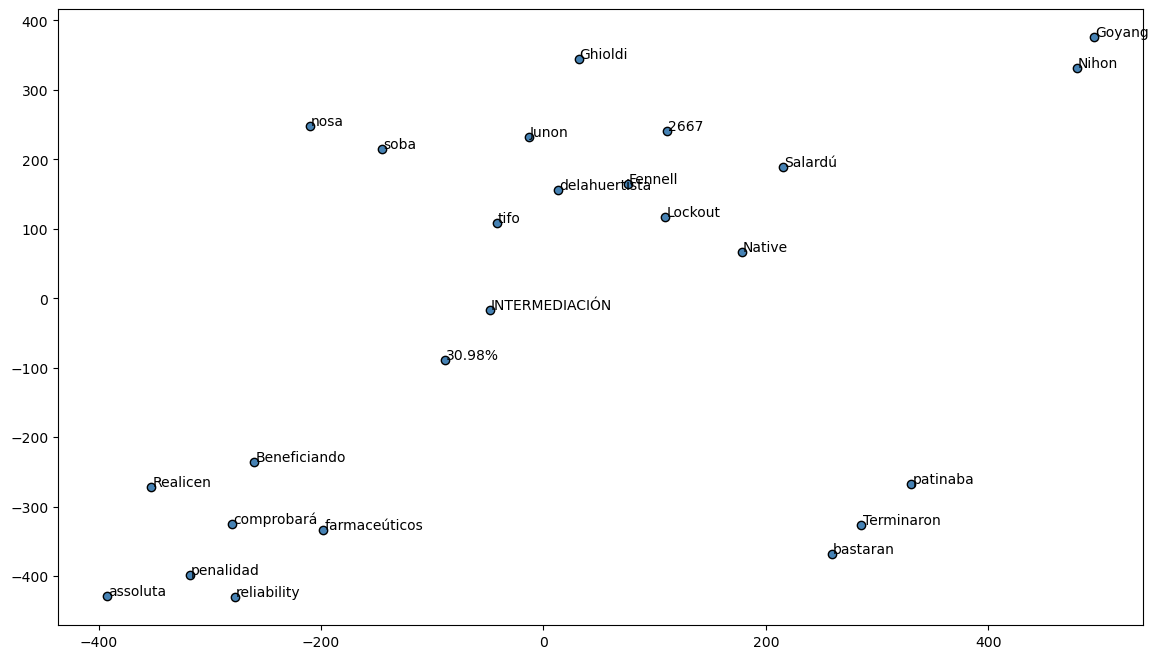

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2, init='random', learning_rate='auto')
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)
labels = words
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

### Visualización PCA

In [36]:
word_vectors = [t.vector for t in np.random.choice(lexemas, 10000, replace=False)]

In [37]:
palabras = ['manzana', 'pera', 'Madrid', 'Toledo']

In [38]:
palabras_vectors = np.array([nlp(word).vector for word in palabras])

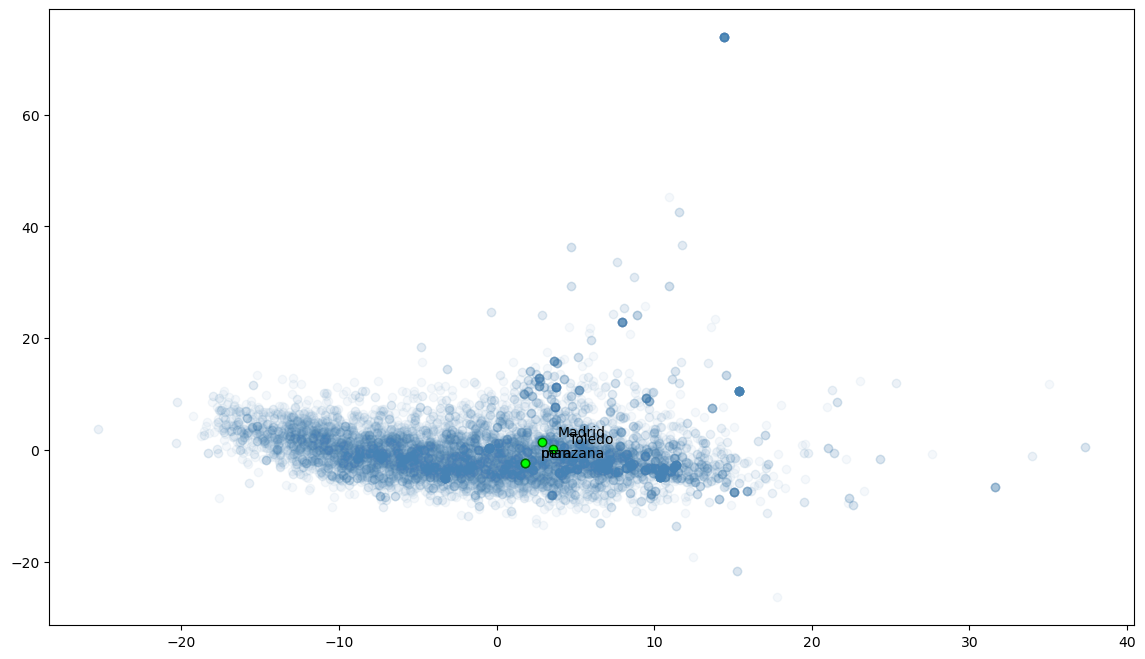

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
T = pca.fit_transform(word_vectors)

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue',alpha=0.05)

labels = palabras
T = pca.transform(palabras_vectors)
plt.scatter(T[:, 0], T[:, 1], c='lime', edgecolors='darkgreen')

for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [40]:
palabras_2 = ['hombre', 'rey', 'mujer', 'reina']

In [41]:
palabras_2_vectors = np.array([nlp(word).vector for word in palabras_2])

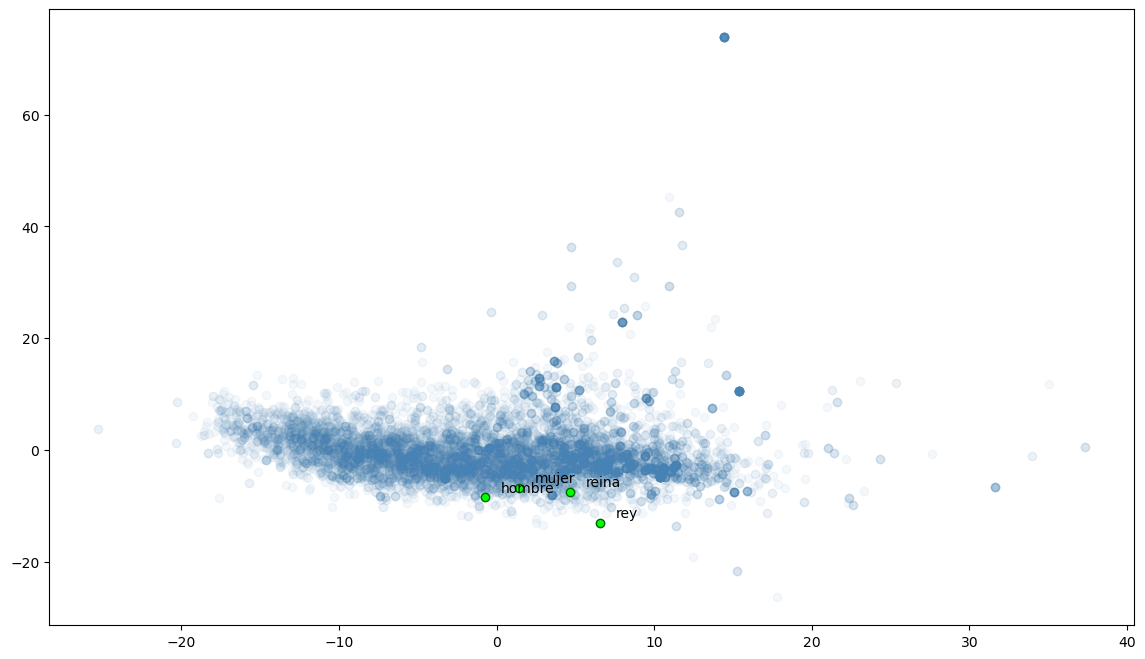

In [42]:
np.set_printoptions(suppress=True)
T = pca.fit_transform(word_vectors)

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue',alpha=0.05)

labels = palabras_2
T = pca.transform(palabras_2_vectors)
plt.scatter(T[:, 0], T[:, 1], c='lime', edgecolors='darkgreen')

for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

### Visualización t-SNE extendida

In [43]:
palabras_all = [t.text for t in np.random.choice(lexemas, 10000, replace=False)] + palabras

In [44]:
palabras_vectors = np.array([nlp(word).vector for word in palabras_all])

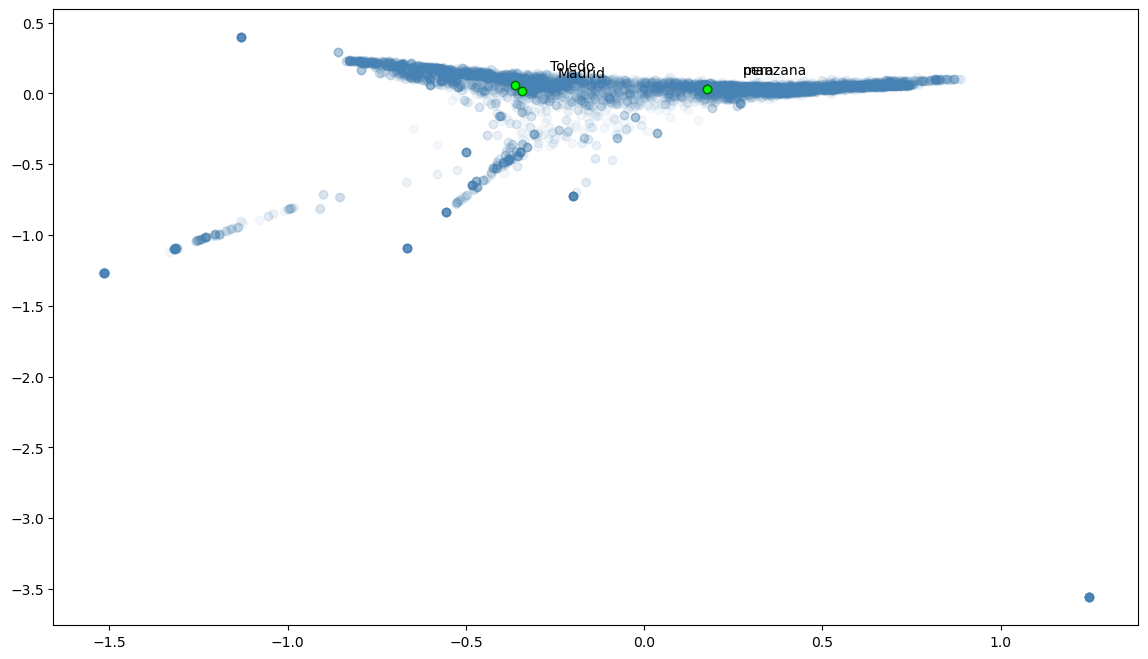

In [45]:
tsne = TSNE(n_components=2, random_state=0, n_iter=250, perplexity=50, init='random', learning_rate='auto')
np.set_printoptions(suppress=True)
T = tsne.fit_transform(palabras_vectors)

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', alpha=0.05)

labels = palabras

plt.scatter(T[-len(palabras):, 0], T[-len(palabras):, 1], c='lime', edgecolors='darkgreen')
for label, x, y in zip(labels, T[-len(palabras):, 0], T[-len(palabras):, 1]):
    plt.annotate(label, xy=(x+0.1, y+0.1), xytext=(0, 0), textcoords='offset points')

# Word embeddings con Gensim
Cargamos un conjunto de WE ya pre-entrenado con la API de Gensim:\
https://radimrehurek.com/gensim/downloader.html

In [46]:
import gensim.downloader as api
list(api.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [47]:
api.info('glove-twitter-50')

{'num_records': 1193514,
 'file_size': 209216938,
 'base_dataset': 'Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased)',
 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/glove-twitter-50/__init__.py',
 'license': 'http://opendatacommons.org/licenses/pddl/',
 'parameters': {'dimension': 50},
 'description': 'Pre-trained vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased (https://nlp.stanford.edu/projects/glove/)',
 'preprocessing': 'Converted to w2v format with `python -m gensim.scripts.glove2word2vec -i <fname> -o glove-twitter-50.txt`.',
 'read_more': ['https://nlp.stanford.edu/projects/glove/',
  'https://nlp.stanford.edu/pubs/glove.pdf'],
 'checksum': 'c168f18641f8c8a00fe30984c4799b2b',
 'file_name': 'glove-twitter-50.gz',
 'parts': 1}

In [48]:
for model_name, model_data in sorted(api.info()['models'].items()):
    print(f"""{model_name} ({model_data.get('num_records', "None")} records):
    {model_data['description']}\n""")

__testing_word2vec-matrix-synopsis (None records):
    [THIS IS ONLY FOR TESTING] Word vecrors of the movie matrix.

conceptnet-numberbatch-17-06-300 (1917247 records):
    ConceptNet Numberbatch consists of state-of-the-art semantic vectors (also known as word embeddings) that can be used directly as a representation of word meanings or as a starting point for further machine learning. ConceptNet Numberbatch is part of the ConceptNet open data project. ConceptNet provides lots of ways to compute with word meanings, one of which is word embeddings. ConceptNet Numberbatch is a snapshot of just the word embeddings. It is built using an ensemble that combines data from ConceptNet, word2vec, GloVe, and OpenSubtitles 2016, using a variation on retrofitting.

fasttext-wiki-news-subwords-300 (999999 records):
    1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).

glove-twitter-100 (1193514 records):
    Pre-trained vectors based on

In [49]:
#cargamos el modelo deseado con
model = api.load("glove-wiki-gigaword-50")
model

Podemos usar los modelos cargados para ver los vectores de una palabra, buscar palabras similares o calcular analogías.\
Los modelos cargados son objetos de clase `models.keyedvectors` (https://radimrehurek.com/gensim/models/keyedvectors.html)

In [ ]:
dir(model)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 '_upconvert_old_d2vkv',
 '_upconvert_old_vocab',
 'add_lifecycle_event',
 'add_vector',
 'add_vectors',
 'allocate_vecattrs',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'expandos',
 'fill_norms',
 'get_index',
 'get_normed_vectors',
 'get_vecattr',
 'get_vector',
 'has_index_for',
 'index2entity',
 'index2word',
 'index_to_key',
 'init_sims',
 'intersect_word2vec_

In [ ]:
vec_king = model['king']

In [ ]:
type(vec_king)

numpy.ndarray

In [ ]:
vec_king.shape

(50,)

In [ ]:
len(model.vectors)

400000

In [ ]:
palabra_rara = 'zamburiña'
try:
    vector = model[palabra_rara]
except KeyError:
    print(f"La palabra '{palabra_rara}' no aparece en este modelo")

La palabra 'zamburiña' no aparece en este modelo


In [ ]:
model.most_similar("apple")

[('blackberry', 0.7543067932128906),
 ('chips', 0.7438643574714661),
 ('iphone', 0.7429664134979248),
 ('microsoft', 0.7334205508232117),
 ('ipad', 0.7331036925315857),
 ('pc', 0.7217226624488831),
 ('ipod', 0.7199784517288208),
 ('intel', 0.7192243337631226),
 ('ibm', 0.7146540880203247),
 ('software', 0.7093585729598999)]

In [ ]:
model.most_similar("bank")

[('banks', 0.8698630332946777),
 ('securities', 0.7996813654899597),
 ('banking', 0.7965158820152283),
 ('investment', 0.7849708199501038),
 ('exchange', 0.7808827757835388),
 ('financial', 0.7670274972915649),
 ('credit', 0.7649155259132385),
 ('lender', 0.7518407702445984),
 ('capital', 0.7380707859992981),
 ('brokerage', 0.7373986840248108)]

In [ ]:
model.similarity('apple','pear')

0.5434469

In [ ]:
model.similarity('banana','pear')

0.64588785

In [ ]:
print(model.doesnt_match("apple pear banana city".split())) #palabra que no encaja en el contexto del resto

city


### Analogías de word vectors con Gensim
Si *palabra_a* es a *palabra_b*, entonces *palabra_c* es a *??*\
Se calcula como el vector más cercano a (a-c)+b

In [ ]:
# hombre es a rey como mujer es a XX
# rey - hombre + mujer 
#https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar_cosmul
model.most_similar(positive=['king','woman'],negative=['man'])

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.759214460849762),
 ('daughter', 0.7473882436752319),
 ('elizabeth', 0.7460219860076904),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337412238121033),
 ('monarch', 0.7214491367340088),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099431157112122)]

### Carga de otros modelos pre-entrenados en Gensim
En lugar de usar su API cargamos los modelos en formato texto. Hay varios modelos en Español en https://github.com/dccuchile/spanish-word-embeddings

In [ ]:
#carga de vectores en formato TXT
from gensim.models.keyedvectors import KeyedVectors
wordvectors_file_vec = '~/Downloads/fasttext-sbwc.100k.vec'
cantidad = 100000
wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file_vec, limit=cantidad)

In [ ]:
wordvectors

In [ ]:
wordvectors['rey'].shape

(300,)

In [ ]:
len(wordvectors.vectors)

100000

In [ ]:
wordvectors.most_similar(positive=['rey','mujer'],negative=['hombre'], topn=3)

[('reina', 0.6306586861610413),
 ('infanta', 0.5454354882240295),
 ('princesa', 0.5346059799194336)]

In [ ]:
wordvectors.most_similar(positive=['yerno','mujer'],negative=['hombre'], topn=3)

[('nuera', 0.6148253679275513),
 ('cuñada', 0.6092045903205872),
 ('esposa', 0.5918745398521423)]

In [ ]:
# correr -> corrían como saltar -> XX
wordvectors.most_similar(positive=['corrían','saltar'],negative=['correr'], topn=3)

[('saltaban', 0.7645256519317627),
 ('saltaron', 0.6752530932426453),
 ('saltaba', 0.6477115750312805)]

In [ ]:
# Francia -> París como España -> XX
wordvectors.most_similar(positive=['parís','españa'],negative=['francia'], topn=3)

[('madrid', 0.7285640835762024),
 ('barcelona', 0.6065388321876526),
 ('londres', 0.5841869711875916)]

### Modelos FastText
Los modelos de FastText se pueden cargar en formato texto (sólo palabras pre-entrenadas) o como modelo binario (calcula nuevas palabras a partir de su n-grama de caracteres)  
Modelos pre-entrenados de FastText: https://github.com/mquezada/starsconf2018-word-embeddings

In [ ]:
wordvectors.most_similar(['adiós'])

[('despedida', 0.691421627998352),
 ('despedirse', 0.6398125290870667),
 ('suspiro', 0.5772554874420166),
 ('despide', 0.5664263367652893),
 ('despedirme', 0.5651066899299622),
 ('querida', 0.5462957620620728),
 ('beso', 0.5451434850692749),
 ('llora', 0.5426937937736511),
 ('despedimos', 0.5414513945579529),
 ('despidieron', 0.5407766699790955)]

In [ ]:
palabra_rara = 'pequeñín'
try:
    vector = wordvectors[palabra_rara]
except KeyError:
    print(f"La palabra '{palabra_rara}' no aparece en este modelo")

La palabra 'pequeñín' no aparece en este modelo


In [ ]:
del(wordvectors)

In [ ]:
# vectores de FastText desde el formato binario (lento, requiere mucha memoria)
# descargado de https://fasttext.cc/docs/en/crawl-vectors.html
# ¡ojo, ocupan 4,5 GB!
from gensim.models.fasttext import load_facebook_vectors

wordvectors_file = '/Users/jovifran/Downloads/cc.es.300.bin'
wordvectors = load_facebook_vectors(wordvectors_file) #carga vectores pre-entrenados sólo

In [ ]:
wordvectors

In [ ]:
wordvectors['adiós'].shape

(300,)

In [ ]:
len(wordvectors.vectors)

2000000

In [ ]:
'pequeñín' in wordvectors.key_to_index

True

In [ ]:
wordvectors.most_similar('pequeñín')

[('chiquitín', 0.8376479744911194),
 ('pequeñajo', 0.8188629746437073),
 ('pequeñin', 0.7753840088844299),
 ('chiquitin', 0.7069396376609802),
 ('hermanito', 0.7063405513763428),
 ('pequeñito', 0.6892264485359192),
 ('bebecito', 0.6682092547416687),
 ('cachorrín', 0.6603713631629944),
 ('cachorrillo', 0.6567479372024536),
 ('monstruito', 0.6553563475608826)]

In [ ]:
#'neorevolucionario' in wordvectors.vocab #versión gensim <4.0
'neorevolucionario' in wordvectors.key_to_index #veersión gensim >=4.0

False

In [ ]:
wordvectors['neorevolucionario'][:10]

array([-0.0017756 , -0.00557737,  0.02735209, -0.00748887, -0.00032134,
       -0.00225213,  0.0021757 , -0.00831577, -0.00053904, -0.01496415],
      dtype=float32)

In [ ]:
wordvectors.most_similar('neorevolucionario')

[('social-revolucionario', 0.7208109498023987),
 ('nacional-revolucionario', 0.676188051700592),
 ('socialista-revolucionario', 0.6590811014175415),
 ('neorealista', 0.6523006558418274),
 ('socialdemocrático', 0.6458190679550171),
 ('militar-fascista', 0.6293484568595886),
 ('premodernismo', 0.6199693083763123),
 ('antirrevolucionario', 0.6183813810348511),
 ('social-fascismo', 0.6162072420120239),
 ('premodernista', 0.6151679158210754)]

Se puede usar como corrector ortográfico

In [ ]:
'ayedo' in wordvectors.key_to_index

False

In [ ]:
wordvectors.most_similar('ayedo')

[('Hayedo', 0.6426955461502075),
 ('hayedo', 0.6414874792098999),
 ('hayedo-abetal', 0.6155832409858704),
 ('Mayedo', 0.5632590055465698),
 ('Carbayedo', 0.5580019950866699),
 ('bosqueque', 0.5321671962738037),
 ('viñedoMirador', 0.5308153033256531),
 ('somiedo', 0.5213027596473694),
 ('aeropuertoTasaKilometraje', 0.5189022421836853),
 ('pinariego', 0.5164927840232849)]

In [ ]:
wordvectors.most_similar('destraumatizar')

[('repararles', 0.5741322636604309),
 ('corporativizar', 0.5684980750083923),
 ('rehabilitarle', 0.5665670037269592),
 ('aniquilarles', 0.5599567890167236),
 ('encajarles', 0.5551352500915527),
 ('anularles', 0.5549553632736206),
 ('destabilizar', 0.5538467764854431),
 ('enjuiciarle', 0.553508460521698),
 ('traumatizarse', 0.5530177354812622),
 ('postraumatico', 0.5526507496833801)]

## Entrenamiento de vectores propios
En lugar de usar vectores preentrenados los podemos entrenar con el modelo `word2vec` de Gensim

In [ ]:
import spacy
nlp = spacy.load('es_core_news_md')

In [ ]:
def normalizar_doc_tokenize(doc):
    '''Función que normaliza un texto cogiendo sólo
    las palabras en minúsculas mayores de 3 caracteres'''
    # separamos en tokens
    tokens = nlp(doc)
    # filtramos stopwords
    filtered_tokens = [t.lower_ for t in tokens if
                       len(t.text)>3 and
                       not t.is_space and
                       not t.is_punct]

    return filtered_tokens

In [ ]:
with open('cañas y barro.txt', 'r', encoding = 'utf-8') as f:
    texto = f.readlines()
TOKENIZED_CORPUS = list(map(normalizar_doc_tokenize, texto))
len(TOKENIZED_CORPUS)

1381

Consideramos cada línea como un documento completo

In [ ]:
TOKENIZED_CORPUS[100]

['tabernero',
 'fingió',
 'principio',
 'oirles',
 'hasta',
 'cansado',
 'sufrir',
 'enderezó',
 'nervioso',
 'impulso',
 'pasando',
 'ojos',
 'chispa',
 'pero',
 'masa',
 'grasienta',
 'cuerpo',
 'pareció',
 'gravitar',
 'sobre',
 'voluntad',
 'encogió',
 'banco',
 'como',
 'aplastado',
 'esfuerzo',
 'gimiendo',
 'otra',
 'dolorosamente',
 'murmurando',
 'entre',
 'quejidos']

In [ ]:
texto[100]

' El tabernero fingió al principio no oirles, hasta que, cansado de sufrir, se enderezó con nervioso impulso, pasando por sus ojos una chispa de ira. Pero la masa grasienta del cuerpo pareció gravitar sobre su voluntad, y se encogió en el banco, como aplastado por el esfuerzo, gimiendo otra vez dolorosamente y murmurando entre quejidos:\n'

Calculamos los vectores de las palabras de nuestro corpus

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(TOKENIZED_CORPUS, #lista de documentos como lista de tokens
                               vector_size=50,          #tamaño del vector
                               window=5,         #nº de términos adyacentes que usamos para el cálculo
                               min_count=10,      #nº mínimo de apariciones del término para contarlo
                               epochs = 50)

#una vez entrenado el modelo nos quedamos con los vectores calculados
#si no se van a actualizar los vectores con nuevos documentos
model = model.wv
len(model.index_to_key)

695

In [ ]:
type(model)

gensim.models.keyedvectors.KeyedVectors

Podemos listar todas las palabras del modelo

In [ ]:
palabras = model.index_to_key

#np.random.seed(42)
np.random.choice(palabras, 10)

array(['espalda', 'obscuridad', 'señores', 'tanta', 'cañas', 'hombre',
       'hacía', 'señores', 'ésta', 'mayor'], dtype='<U15')

El ID de cada palabra está en el diccionario `key_to_index`

In [ ]:
model.key_to_index['vicario']

270

Corresponde al índice de esa palabra en la lista `index_to_key`

In [ ]:
model.index_to_key[270]

'vicario'

Podemos ver el vector correspondiente a cualquier palabra del vocabulario

In [ ]:
model['vicario']

array([ 0.15246107,  0.01715709,  0.59552956,  0.24753447,  0.17059456,
       -0.41010135,  0.11403884,  0.13501188, -0.33331767, -0.72438544,
       -0.700216  , -0.46932667, -0.26459086,  0.35863477,  0.41044533,
       -0.15370046,  0.15640846,  0.00589026, -0.5355016 , -0.4804913 ,
       -0.4858625 , -0.14886433,  0.40557617,  0.37663585,  0.08384529,
        0.5560369 , -0.43115357, -0.19770446, -0.591594  ,  0.08022748,
       -0.10395772, -0.01562154, -0.05259194,  0.18710068, -0.22708033,
       -0.12239651,  0.60072404,  0.31908348, -0.04037494,  0.20645286,
        0.52993506, -0.17035906,  0.23993081,  0.32119104,  0.9270599 ,
        0.24388649,  0.16446349,  0.27090007, -0.02549206,  0.3501629 ],
      dtype=float32)

In [ ]:
model['vicario'].shape

(50,)

Podemos calcular la similitud entre palabras y buscar afinidades entre palabras

In [ ]:
model.most_similar('vicario')

[('haber', 0.7899959087371826),
 ('antigua', 0.7865177392959595),
 ('noticia', 0.7820051908493042),
 ('enemigos', 0.7696929574012756),
 ('pensar', 0.7623171210289001),
 ('palomas', 0.7303298115730286),
 ('único', 0.728350818157196),
 ('comía', 0.7261202931404114),
 ('entraba', 0.7213602662086487),
 ('cristo', 0.6990529894828796)]

In [ ]:
model.most_similar('triste')

[('esperanza', 0.7993088960647583),
 ('únicamente', 0.795781135559082),
 ('sentíase', 0.77482008934021),
 ('misma', 0.7745146751403809),
 ('lloraba', 0.7604208588600159),
 ('doloroso', 0.7435235977172852),
 ('dolor', 0.7166022062301636),
 ('hubiese', 0.71489417552948),
 ('sonrisa', 0.713079035282135),
 ('borracho', 0.708263099193573)]

In [ ]:
wordvectors.most_similar('triste')

[('trsite', 0.7293983101844788),
 ('tristísima', 0.7289509177207947),
 ('tristísimo', 0.7270605564117432),
 ('deprimente', 0.7144803404808044),
 ('triste.Es', 0.7007802724838257),
 ('Triste', 0.6873935461044312),
 ('triste.Y', 0.6784143447875977),
 ('lamentable', 0.6741007566452026),
 ('triste.La', 0.6641337275505066),
 ('triste.Pero', 0.663995623588562)]

In [ ]:
print(model.similarity('muchacha', 'mujer'))

0.5041699


In [ ]:
print(wordvectors.similarity('muchacha', 'mujer'))

0.68459153


In [ ]:
print(model.similarity('ciudad', 'plaza'))

0.2673487


In [ ]:
print(wordvectors.similarity('ciudad', 'plaza'))

0.5187106


In [ ]:
print(model.similarity('muchacha', 'ciudad'))

-0.09648161


Visualizamos los vectores de nuestro vocabulario en 2 dimensiones con el algoritmo t-SNE

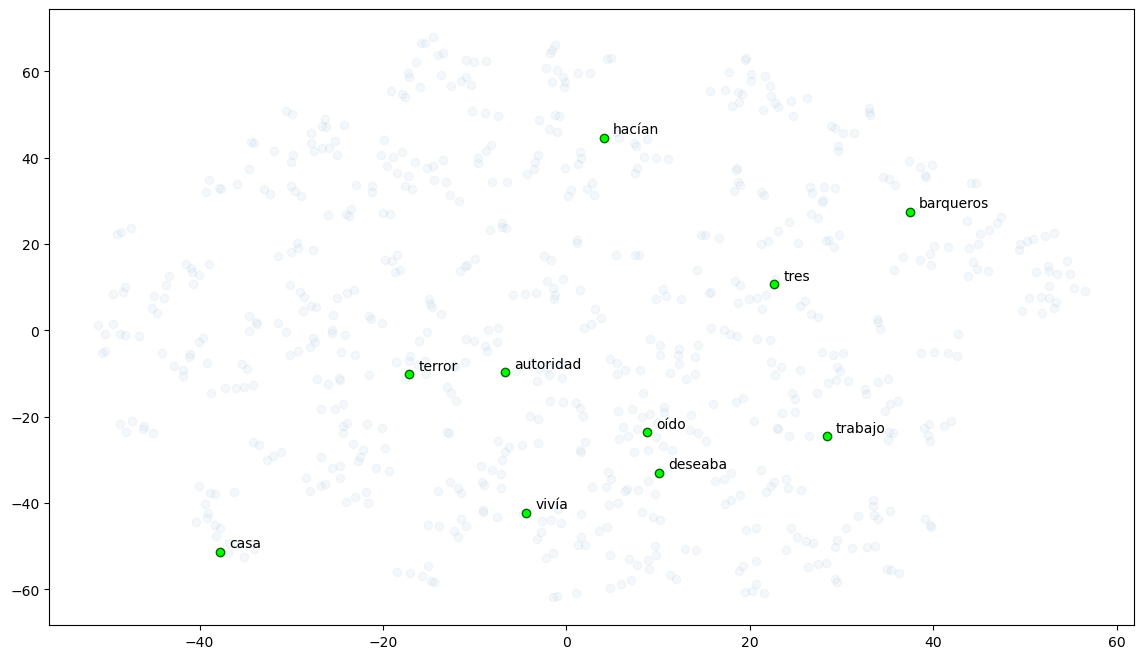

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

np.random.seed=42
palabras_sm = np.random.choice(palabras, 10, replace=False)
vectores = model[palabras]
index_sm = [model.key_to_index[p] for p in palabras_sm]


tsne = TSNE(n_components = 2,
            random_state = 0,
            n_iter = 1000,
            perplexity = 5,
            init = 'random',
            learning_rate = 'auto')
np.set_printoptions(suppress=True)
    
T = tsne.fit_transform(vectores)

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', alpha=0.05)

labels = palabras_sm
T_sm = T[index_sm,:]
plt.scatter(T_sm[:, 0], T_sm[:, 1], c='lime', edgecolors='darkgreen')
for label, x, y in zip(labels, T_sm[:, 0],T_sm[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')


Ahora cargamos los vectores del modelo GloVe del módulo `spaCy` para nuestro corpus de prueba y representamos

In [ ]:
word_glove_vectors = np.array([nlp(word).vector for word in palabras])

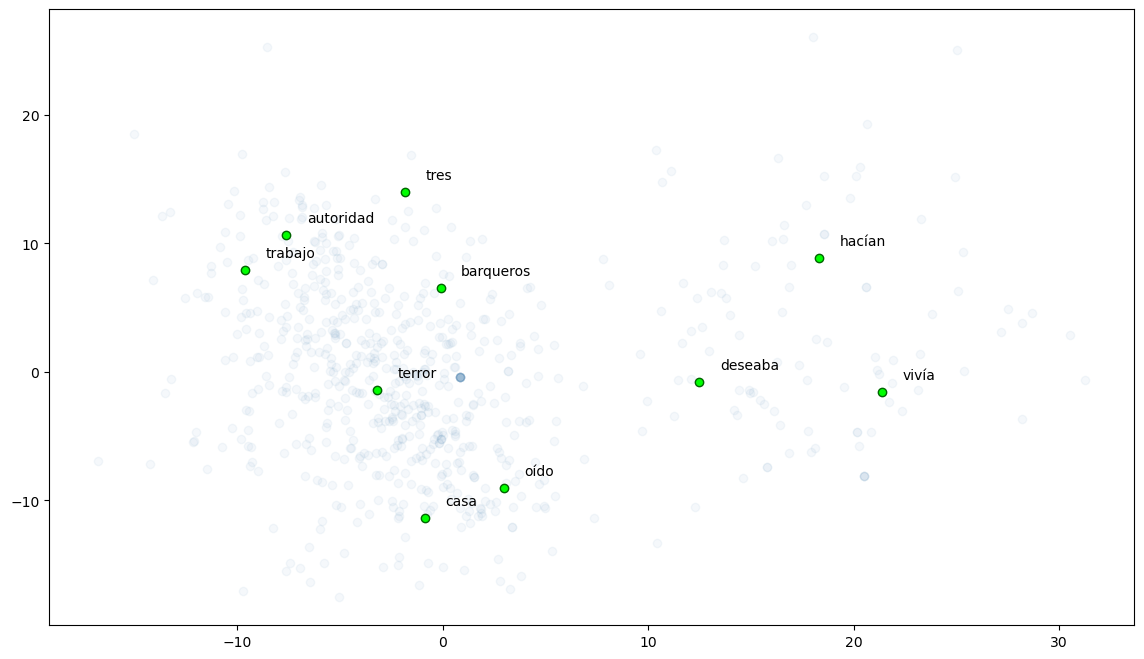

In [ ]:
from sklearn.decomposition import PCA

tsne = PCA(n_components=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', alpha=0.05)

labels = palabras_sm
T_sm = T[index_sm,:]
plt.scatter(T_sm[:, 0], T_sm[:, 1], c='lime', edgecolors='darkgreen')
for label, x, y in zip(labels, T_sm[:, 0],T_sm[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [ ]:
nlp.vocab['muchacha'].similarity(nlp.vocab['mujer'])

0.7158858776092529

In [ ]:
nlp.vocab['ciudad'].similarity(nlp.vocab['plaza'])

0.5571774244308472

In [ ]:
nlp.vocab['muchacha'].similarity(nlp.vocab['ciudad'])

0.18544918298721313

# Vectores de documento (modelos semánticos)
Los vectores de documento recogen el sentido semántico de todo el documento como un vector de dimensines únicas.
## Modelos basados en *word embeddings*
Calcula el promedio de los *word embeddings* del documento para obtener un vector con sentido semántico de todo el documento.

In [ ]:
import spacy
nlp = spacy.load('es_core_news_md')

#Librería spaCy
#El atributo vector del Doc o Span calcula el promedio de sus vectores de palabra

doc1 = nlp("Me gustan las patatas fritas y las hamburguesas.")
doc2 = nlp("La comida rápida sabe muy bien.")

In [ ]:
type(doc1[0])

spacy.tokens.token.Token

In [ ]:
doc1[0].vector.shape

(300,)

In [ ]:
type(doc1)

spacy.tokens.doc.Doc

In [ ]:
doc1.vector.shape

(300,)

In [ ]:
type(doc1[2:4])

spacy.tokens.span.Span

In [ ]:
doc1[2:4].vector.shape

(300,)

In [ ]:
# Similitud de dos documentos
print(doc1, "<->", doc2, doc1.similarity(doc2))
# Similitud de tokens y spans
patatas_fritas = doc1[3:5]
hamburguesas = doc1[7]
print(patatas_fritas, "<->", hamburguesas, patatas_fritas.similarity(hamburguesas))

Me gustan las patatas fritas y las hamburguesas. <-> La comida rápida sabe muy bien. 0.1747243604431588
patatas fritas <-> hamburguesas 0.7975882887840271


In [ ]:
comida_rapida = doc2[1:3]
print(patatas_fritas, "<->", comida_rapida, patatas_fritas.similarity(comida_rapida))

patatas fritas <-> comida rápida 0.4249328672885895


In [ ]:
muy_bien = doc2[4:6]
print(patatas_fritas, "<->", muy_bien, patatas_fritas.similarity(muy_bien))

patatas fritas <-> muy bien 0.2983543574810028


In [ ]:
bk = nlp("hamburguesería")
print(patatas_fritas, "<->", bk, patatas_fritas.similarity(bk))

patatas fritas <-> hamburguesería 0.6438291304327391


In [ ]:
#Librería Gensim
#calculamos a mano el vector promedio
import numpy as np
from numpy.linalg import norm # para normalizar datos

def to_vector(texto):
    tokens = texto.split()
    vec = np.zeros(300)
    for word in tokens:
        # si la palabra está la acumulamos
        if word in wordvectors:
            vec += wordvectors[word]
    return vec / norm(vec)

In [ ]:
#carga de vectores en formato TXT
from gensim.models.keyedvectors import KeyedVectors
wordvectors_file_vec = '~/Downloads/fasttext-sbwc.100k.vec'
wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file_vec)

In [ ]:
texto = 'me gustan los gatos'
to_vector(texto).shape

(300,)

In [ ]:
#Calculamos similitud entre vectores de documentos
def similarity(texto_1, texto_2):
    vec_1 = to_vector(texto_1)
    vec_2 = to_vector(texto_2)
    sim = vec_1 @ vec_2 #producto punto de numpy
    return sim

In [ ]:
texto_1 = 'los felinos son lindos'
texto_2 = 'quiero comer pizza'

print(similarity(texto, texto_1))
print(similarity(texto, texto_2))

0.727431690699037
0.642677489556051


In [ ]:
texto_3 = 'me gusta la hamburguesa'

print(similarity(texto, texto_3))
print(similarity(texto_2, texto_3))

0.7769273489743295
0.787029925724716


Con un modelo propio de vectores de documentos (modelo `doc2vec` de Gensim)

In [ ]:
#doc2vec
from gensim.models.doc2vec import TaggedDocument


#Creamos corpus de entrada
all_docs = [TaggedDocument(tokens, [str(index)])
                for index, tokens in enumerate(TOKENIZED_CORPUS)]

In [ ]:
all_docs[100]

TaggedDocument(words=['tabernero', 'fingió', 'principio', 'oirles', 'hasta', 'cansado', 'sufrir', 'enderezó', 'nervioso', 'impulso', 'pasando', 'ojos', 'chispa', 'pero', 'masa', 'grasienta', 'cuerpo', 'pareció', 'gravitar', 'sobre', 'voluntad', 'encogió', 'banco', 'como', 'aplastado', 'esfuerzo', 'gimiendo', 'otra', 'dolorosamente', 'murmurando', 'entre', 'quejidos'], tags=['100'])

In [ ]:
from gensim.models import Doc2Vec

model_d2v = Doc2Vec(all_docs, vector_size=50,
                                 window=5, min_count=5, workers=4,
                                 alpha=0.025, 
                                 min_alpha=0.025,
                                 dm=0, dbow_words=0, dm_concat=0)

In [ ]:
model_d2v.train(all_docs, total_examples=len(all_docs), epochs=200)

In [ ]:
len(model_d2v.dv)

1381

In [ ]:
#Una vez entrenado podemos ver el vector de cada documento
model_d2v.dv[100]

array([ 0.80056137, -0.07176054,  0.29593432, -0.9272865 ,  1.1133586 ,
        0.8245769 , -0.0007819 ,  0.57421076,  0.09784851,  0.13904501,
       -1.2424682 ,  0.00012046, -1.464981  , -1.896688  , -0.22751652,
        0.11892538,  0.11364514, -0.81794596, -0.16767968, -0.63529384,
        0.10988197, -0.00320366,  1.489968  ,  1.3490874 , -1.0391719 ,
        1.2828002 ,  0.2052049 ,  0.7003877 , -0.32171783, -0.31829593,
       -1.2932514 ,  2.5614    , -0.00078768,  1.1143849 ,  0.7715444 ,
        0.73391825, -0.8360327 , -0.8776742 ,  0.1816576 ,  1.300458  ,
       -0.7914103 ,  0.52927834,  0.50562155, -0.03787526,  2.4464855 ,
        0.53561413,  1.2314334 ,  0.7841221 , -0.17006336, -0.11244118],
      dtype=float32)

In [ ]:
model_d2v.dv[100].shape

(50,)

In [ ]:
#El modelo word vectors que usa internamente Doc2vec es igual que el de Word2Vec:
palabras = model_d2v.wv.index_to_key
len(palabras)

1604

In [ ]:
type(model_d2v.wv)

gensim.models.keyedvectors.KeyedVectors

In [ ]:
model_d2v.wv['valencia']

array([ 0.00445403, -0.01506699,  0.01125671, -0.01000023, -0.00654218,
       -0.00366524,  0.01643253,  0.00449281, -0.0018153 , -0.00569055,
       -0.0042239 , -0.00257161, -0.01016584, -0.00825666,  0.00037489,
        0.00910934,  0.00359229,  0.01380537,  0.00127943, -0.00644866,
       -0.01474663,  0.01201401,  0.01393987, -0.01211661,  0.00936798,
        0.01899708, -0.01276137, -0.00575389, -0.0181806 ,  0.00645622,
       -0.00688052,  0.00408842,  0.01887896, -0.01671387, -0.0186261 ,
        0.00343336, -0.01606883, -0.01813501, -0.01871044, -0.0005768 ,
       -0.00220341,  0.00148753, -0.00267965,  0.0180799 ,  0.01757546,
       -0.01271465,  0.01739169, -0.01805622, -0.00267686,  0.00507967],
      dtype=float32)

In [ ]:
model_d2v.wv['valencia'].shape

(50,)

In [ ]:
model_d2v.wv.most_similar('valencia')

[('todo', 0.4476557970046997),
 ('llegaba', 0.4061397314071655),
 ('odio', 0.4056428074836731),
 ('nombre', 0.40453991293907166),
 ('altos', 0.40254443883895874),
 ('extraño', 0.3922993242740631),
 ('estar', 0.37759196758270264),
 ('barca', 0.373142808675766),
 ('gritos', 0.36948826909065247),
 ('éstos', 0.36523526906967163)]

In [ ]:
#Para calcular el docvec de un doc nuevo:
new_doc = 'El tabernero se quejó entre murmullos por hacerle sufrir'
new_d2v = model_d2v.infer_vector(normalizar_doc_tokenize(new_doc), epochs=100)
new_d2v

array([ 0.6216171 ,  0.4921275 ,  0.04146772, -0.5396136 ,  0.07185186,
        0.02581542, -0.21619293,  0.4941185 ,  0.04640447, -0.02774161,
       -1.0477914 ,  0.774963  , -0.55880374, -0.29330233, -0.08316355,
        0.20416847,  0.20482172, -0.13125958, -0.07725117, -0.28272402,
        0.51948947,  0.01071363,  0.5468217 ,  0.12497537, -0.15532644,
        0.8468597 ,  0.45778814,  0.6115138 , -0.22491632, -0.0735805 ,
       -0.5237213 ,  1.0454115 ,  0.09510711,  0.53427184,  0.7087361 ,
        0.08260621, -0.30368456,  0.15557766,  0.35013974,  0.28014883,
        0.51038927,  0.00101319,  0.2644097 , -0.21811585,  0.8065963 ,
        0.14441565,  0.61386585, -0.25564057,  0.14933147, -0.02968944],
      dtype=float32)

In [ ]:
model_d2v.dv.most_similar(positive=[new_d2v])

[('100', 0.7276248335838318),
 ('725', 0.7116455435752869),
 ('643', 0.5941308736801147),
 ('770', 0.5906651020050049),
 ('71', 0.5868561267852783),
 ('1248', 0.5729557871818542),
 ('433', 0.5684224367141724),
 ('825', 0.5557523369789124),
 ('1199', 0.5541306734085083),
 ('209', 0.5531066060066223)]

In [ ]:
' '.join(TOKENIZED_CORPUS[725])

'--_¡solteume!_--gritaba entre espumarajos rabia-- solteume eixe pillo mate'

In [ ]:
' '.join(TOKENIZED_CORPUS[100])

'tabernero fingió principio oirles hasta cansado sufrir enderezó nervioso impulso pasando ojos chispa pero masa grasienta cuerpo pareció gravitar sobre voluntad encogió banco como aplastado esfuerzo gimiendo otra dolorosamente murmurando entre quejidos'

### Modelo Sentence embeddings (SBERT)
Usamos un modelo *transformer* entrenado en texto en inglés.

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

# Two lists of sentences
sentences1 = ['The cat sits outside',
             'A man is playing guitar',
             'The new movie is awesome']

sentences2 = ['The dog plays in the garden',
              'A woman listens to music',
              'The new movie is so great']

#Compute embedding for both lists
embeddings1 = model.encode(sentences1, convert_to_tensor=True)
embeddings2 = model.encode(sentences2, convert_to_tensor=True)

#Compute cosine-similarities
cosine_scores = util.cos_sim(embeddings1, embeddings2)

In [ ]:
embeddings1.shape

torch.Size([3, 384])

In [ ]:
embeddings1[0]

tensor([ 1.3919e-01,  3.0291e-03,  4.7015e-02,  3.9574e-02, -4.7999e-02,
        -6.8115e-03,  1.5053e-02,  3.3377e-02, -1.8424e-02, -1.6704e-02,
        -5.4434e-02,  1.9962e-02,  7.5653e-03, -1.9225e-03,  3.4423e-02,
        -1.6977e-02, -8.5258e-02, -9.2597e-03,  5.4887e-02,  2.0590e-02,
        -1.0523e-01,  6.1211e-02, -6.4824e-03, -1.4375e-02, -7.0206e-02,
         1.5873e-02, -3.0297e-02, -2.5505e-02,  1.1151e-02, -2.5969e-02,
        -2.9367e-02, -4.0450e-02, -2.0300e-02,  5.0442e-02,  3.0197e-02,
        -9.2331e-02,  4.5948e-03, -3.5204e-02,  5.1686e-02,  3.8172e-02,
        -2.7865e-02,  1.7188e-02, -2.8938e-02, -3.5422e-02,  1.4704e-02,
        -4.2009e-02,  3.1821e-02, -6.1628e-02,  6.6397e-02, -7.4332e-02,
        -9.8153e-02,  6.3252e-02, -5.7290e-02,  7.2809e-02, -8.7268e-02,
         1.8130e-02,  5.8723e-02, -4.8213e-02, -3.1492e-02, -5.3805e-02,
         8.1263e-02,  3.7676e-02, -1.5497e-02,  6.7220e-02,  5.6121e-02,
        -4.5193e-02,  1.6611e-02, -2.5355e-02,  4.8

In [ ]:
cosine_scores.shape

torch.Size([3, 3])

In [ ]:
cosine_scores

tensor([[ 0.2838,  0.1092, -0.0029],
        [ 0.2277,  0.2640, -0.0136],
        [ 0.0543, -0.0854,  0.8939]])

In [ ]:
for i, s1 in enumerate(sentences1):
    for j, s2 in enumerate(sentences2):
        print(f"{s1}, {s2} \t Score: {cosine_scores[i][j]:.4f}")

The cat sits outside, The dog plays in the garden 	 Score: 0.2838
The cat sits outside, A woman listens to music 	 Score: 0.1092
The cat sits outside, The new movie is so great 	 Score: -0.0029
A man is playing guitar, The dog plays in the garden 	 Score: 0.2277
A man is playing guitar, A woman listens to music 	 Score: 0.2640
A man is playing guitar, The new movie is so great 	 Score: -0.0136
The new movie is awesome, The dog plays in the garden 	 Score: 0.0543
The new movie is awesome, A woman listens to music 	 Score: -0.0854
The new movie is awesome, The new movie is so great 	 Score: 0.8939
